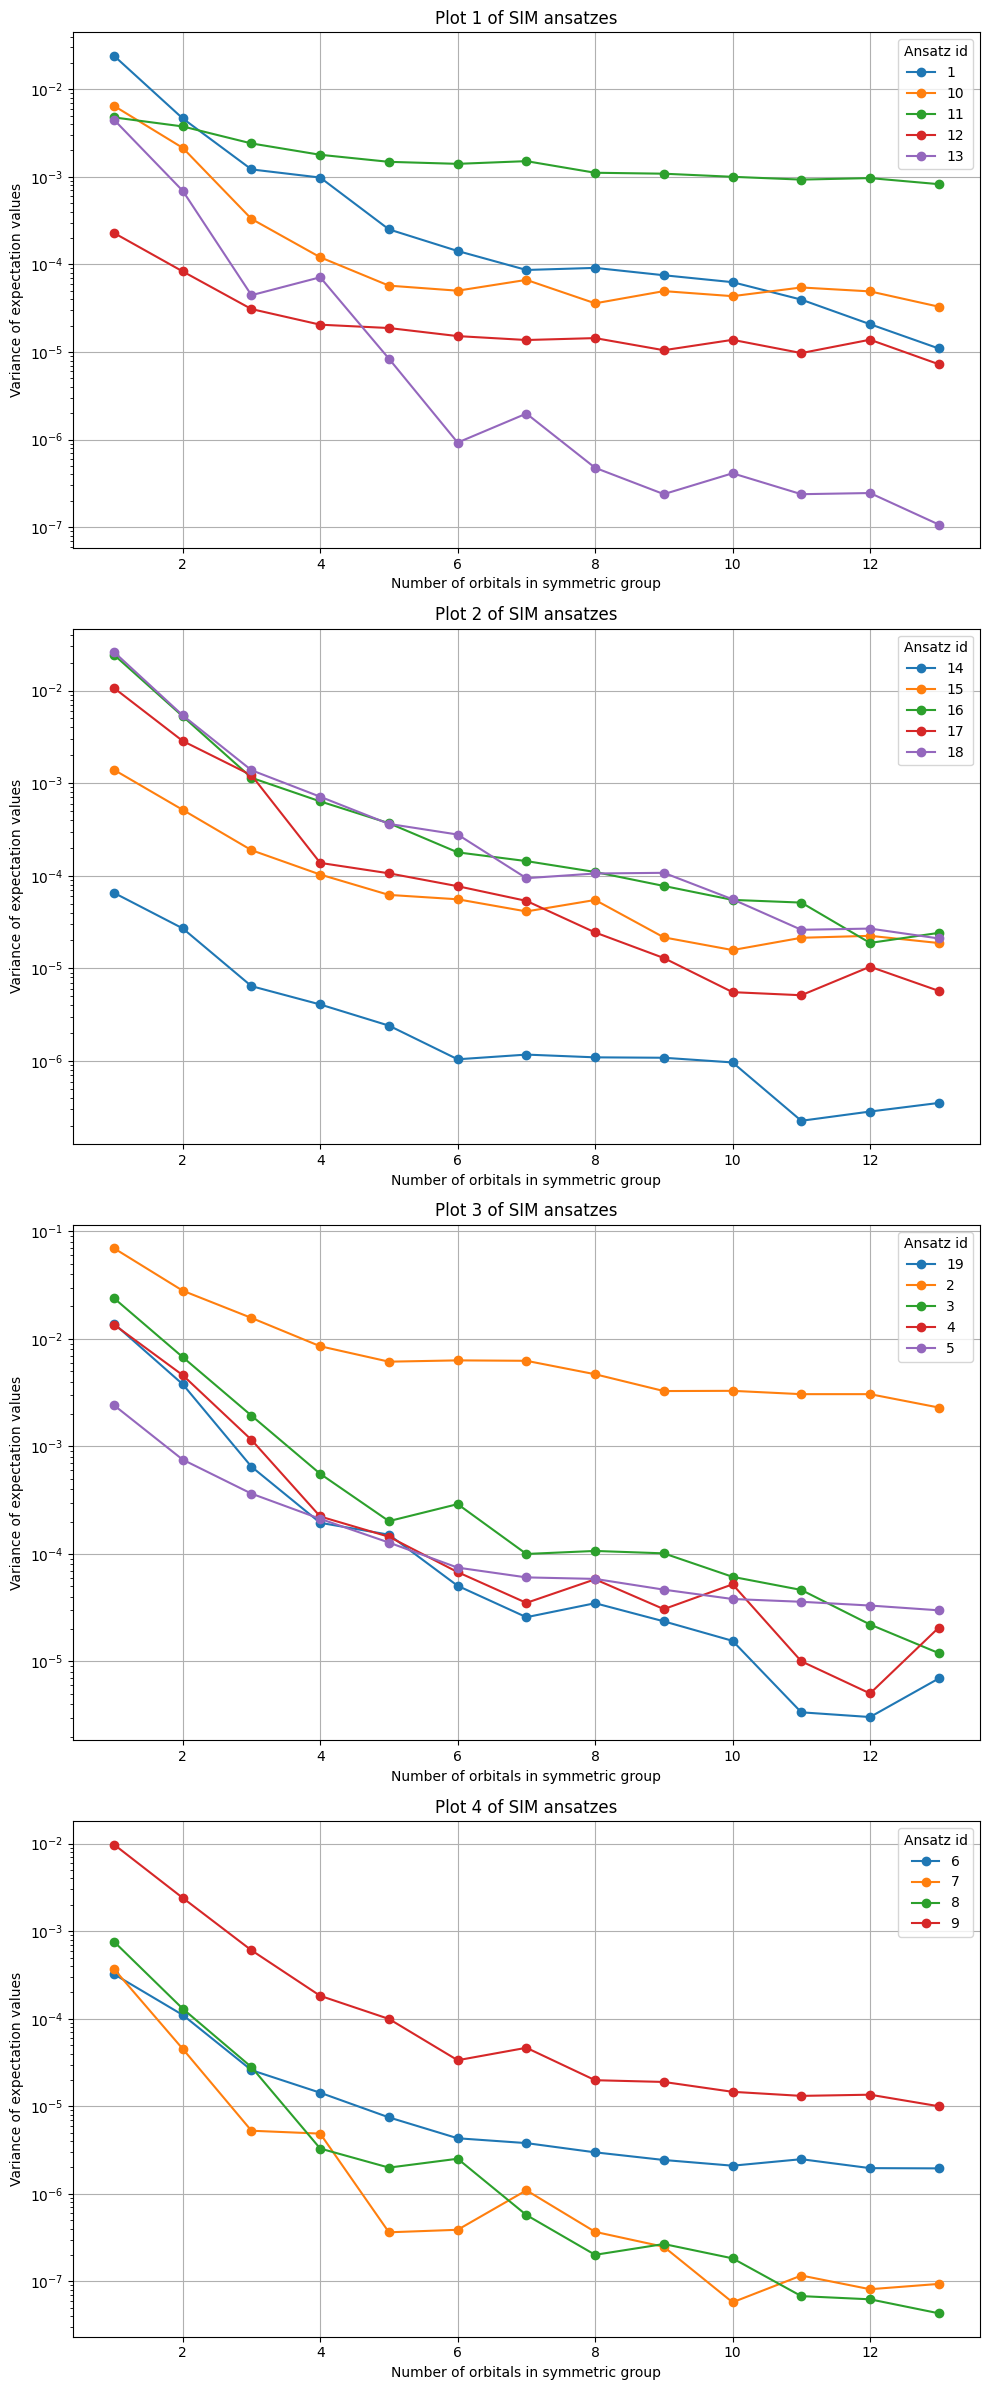

In [1]:
import json
import glob
import math
import matplotlib.pyplot as plt

def load_json_data(filename):
    with open(filename, "r") as f:
        return json.load(f)
    
def plot_results():
    files = sorted(glob.glob("results_*.json"))  # Find all matching files
    num_plots = 4  # Number of subplots
    files_per_plot = math.ceil(len(files) / num_plots)
    
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6 * num_plots))
    
    if num_plots == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one plot
    
    for i in range(num_plots):
        ax = axes[i]
        subset_files = files[i * files_per_plot:(i + 1) * files_per_plot]
        
        for file in subset_files:
            file_number = file.split("_")[1].split(".")[0]  # Extract the number from filename
            data = load_json_data(file)
            x = list(map(int, data.keys()))  # Convert keys to integers
            y = list(data.values())
            ax.plot(x, y, marker="o", label=f"{file_number}")
        
        ax.set_xlabel("Number of orbitals in symmetric group")
        ax.set_ylabel("Variance of expectation values")
        ax.set_yscale("log")  # Set y-axis to logarithmic scale
        ax.set_title(f"Plot {i+1} of SIM ansatzes")
        ax.legend(title="Ansatz id")
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()


plot_results()